## Notmnist analysis

Not_mnist is image recognition dataset with the letters from A through J, similar to the well-known mnist dataset.

The objective is to recognize the letters in the images. (A image contains just one letter)

The datasets used on this project are available on http://yaroslavvb.com/upload/notMNIST/

The datasets should be downloaded and decompressed in the input folder (The folder can be changed by modifying the INPUT_FOLDER in preprocess.py)

In [130]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from collections import defaultdict
import random
import math

import preprocess


%matplotlib inline

In [154]:
x, y = preprocess.preprocess("notMNIST_small")
x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

/home/runix/Projects/academic/master_dc_urjc/MISC/notmnist_python/preprocess.py:35: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if dataset == None:


In [31]:
image_by_class = defaultdict(list)
for label, image in zip(y, x):
    image_by_class[label].append(image)
    
for label in image_by_class:
    image_by_class[label] = np.array(image_by_class[label])

In [107]:
len(x)

18724

In [106]:
for label in image_by_class:
    print("The label {0} has {1} images".format(label, len(image_by_class[label])))

The label E has 1873 images
The label D has 1873 images
The label J has 1872 images
The label A has 1872 images
The label H has 1872 images
The label C has 1873 images
The label G has 1872 images
The label I has 1872 images
The label B has 1873 images
The label F has 1872 images


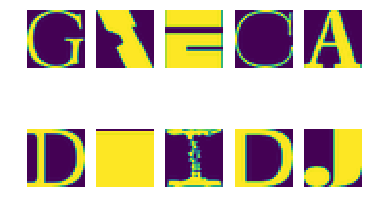

In [143]:
def observation2img(observation, width=28, height=28):
    return np.reshape(observation, newshape=(width, height))
    
num_samples = 10
for i, img in enumerate(random.sample(list(x), num_samples)):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.axis('off')
    plt.imshow(observation2img(img))

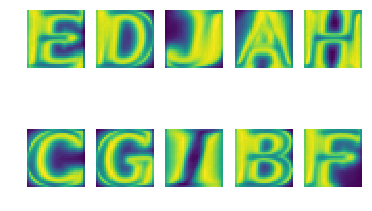

In [152]:
classes_mean = []
tags = []
num_classes = len(image_by_class)
image_means = {}

for i, label in enumerate(image_by_class):
    newimg = np.var(image_by_class[label], axis=(0))
    image_means[label] = newimg
    
    plt.subplot(2, num_classes // 2, i + 1)
    plt.axis('off')
    plt.imshow(observation2img(newimg))

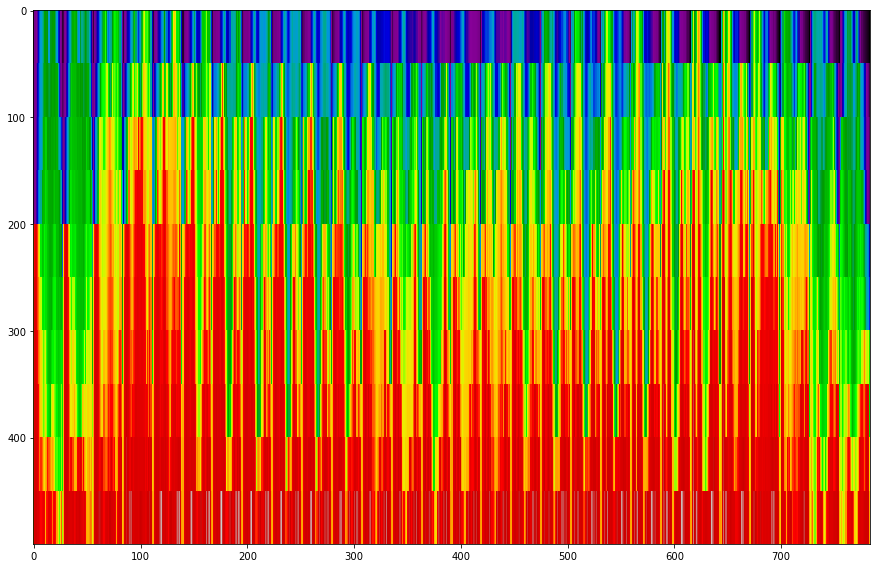

In [153]:
replication_factor = 50
image_letter_means = []
labels = []
for label, image in image_means.items():
    image_letter_means.extend([image] * replication_factor)
    labels.extend([label] * replication_factor)


image_letter_means = np.array(image_letter_means)
labels = np.array(labels)
image_letter_means = np.sort(image_letter_means, axis=0)


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)
imgplot = ax.imshow(image_letter_means)
imgplot.set_cmap('nipy_spectral')

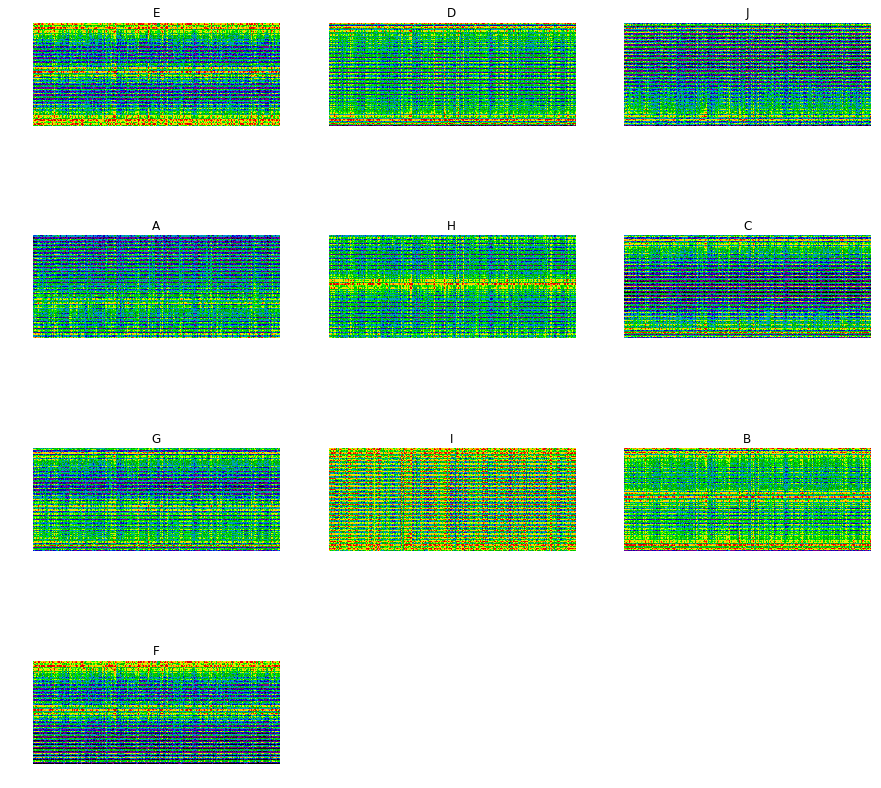

In [141]:
fig = plt.figure(figsize = (15, 15))

for i, label in enumerate(image_by_class):
    img = image_by_class[label]
    
    ax = fig.add_subplot(4, math.ceil(num_classes / 4), i + 1)
    ax.axis('off')
    ax.set_title(label)
    ax.imshow(img.T, cmap="nipy_spectral", interpolation="kaiser")

In [158]:
EPSILON = 0.1

for label, images in image_by_class.items():
    images = np.sort(images, axis=0)
    
    num_images = images.shape[0]
    i = 0
    
    while i < num_images:
        j = i + 1
        ref = images[i]
        while j < num_images:
            test = images[j]
            
            print(np.sum(ref-test))
            j += 1
        
        i = j
            

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.00392157
-0.00784314
-0.00784314
-0.00784314
-0.00784314
-0.0117647
-0.0156863
-0.0156863
-0.0156863
-0.0196078
-0.0196078
-0.0235294
-0.0313725
-0.0352941
-0.0352941
-0.0392157
-0.0431373
-0.0509804
-0.054902
-0.0627451
-0.0666667
-0.0745098
-0.0823529
-0.0941176
-0.113725
-0.12549
-0.129412
-0.14902
-0.156863
-0.184314
-0.2
-0.203922
-0.223529
-0.243137
-0.262745
-0.278431
-0.298039
-0.313725
-0.32549
-0.345098
-0.384314
-0.431373
-0.462745
-0.482353
-0.509804
-0.552941
-0.576471
-0.611765
-0.666667
-0.686274
-0.745098
-0.796078
-0.839216
-0.882353
-0.952941
-1.0
-1.03922
-1.06667
-1.13725
-1.18039
-1.22745
-1.29412
-1.34902
-1.40784
-1.49804
-1.58431
-1.63137
-1.690

-5.55686
-5.77255
-5.97255
-6.17255
-6.34118
-6.58823
-6.74902
-6.93725
-7.12549
-7.36471
-7.59608
-7.78823
-7.97647
-8.21961
-8.44314
-8.67843
-8.8549
-9.11765
-9.33333
-9.59216
-9.78823
-10.0039
-10.2314
-10.4863
-10.7451
-10.9725
-11.2118
-11.451
-11.7255
-11.9843
-12.2353
-12.4431
-12.7059
-12.9686
-13.2549
-13.5255
-13.8157
-14.0392
-14.2784
-14.502
-14.8314
-15.1216
-15.4471
-15.702
-15.9843
-16.2588
-16.5725
-16.902
-17.1843
-17.4902
-17.851
-18.1882
-18.4235
-18.7451
-19.0784
-19.3216
-19.6118
-19.9569
-20.2431
-20.5412
-20.8353
-21.1529
-21.4824
-21.7725
-22.0588
-22.4902
-22.8
-23.1922
-23.4745
-23.8235
-24.2078
-24.6274
-24.9725
-25.2902
-25.5843
-25.902
-26.2157
-26.5725
-26.9373
-27.2549
-27.6078
-27.9961
-28.2941
-28.6392
-28.9882
-29.302
-29.5961
-29.9412
-30.3333
-30.6431
-31.0039
-31.349
-31.698
-32.1098
-32.4627
-32.8549
-33.2784
-33.6824
-34.0706
-34.4431
-34.749
-35.1451
-35.502
-35.7843
-36.1569
-36.5137
-36.9176
-37.3255
-37.6784
-38.0588
-38.3961
-38.8274
-39.282

-171.255
-171.886
-172.388
-172.992
-173.565
-174.196
-174.773
-175.341
-175.835
-176.396
-177.0
-177.553
-178.082
-178.643
-179.184
-179.765
-180.365
-180.816
-181.388
-181.988
-182.494
-182.984
-183.475
-184.173
-184.769
-185.345
-185.922
-186.478
-187.102
-187.663
-188.306
-188.808
-189.435
-190.035
-190.635
-191.212
-191.82
-192.341
-192.906
-193.42
-193.976
-194.549
-195.125
-195.639
-196.208
-196.769
-197.255
-197.714
-198.235
-198.827
-199.314
-199.808
-200.314
-200.784
-201.365
-201.91
-202.439
-202.941
-203.502
-203.918
-204.529
-205.047
-205.51
-206.075
-206.592
-207.173
-207.702
-208.271
-208.859
-209.341
-209.886
-210.388
-210.933
-211.447
-211.914
-212.431
-212.918
-213.451
-214.031
-214.533
-215.114
-215.604
-216.082
-216.635
-217.122
-217.612
-218.133
-218.627
-219.125
-219.718
-220.29
-220.769
-221.275
-221.8
-222.259
-222.78
-223.275
-223.757
-224.212
-224.784
-225.278
-225.757
-226.243
-226.69
-227.196
-227.714
-228.212
-228.643
-229.184
-229.706
-230.2
-230.651
-231.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.00392157
-0.00392157
-0.00392157
-0.00392157
-0.00392157
-0.00784314
-0.0117647
-0.0117647
-0.0117647
-0.0117647
-0.0117647
-0.0117647
-0.0117647
-0.0117647
-0.0156863
-0.0156863
-0.0156863
-0.0156863
-0.0156863
-0.0235294
-0.027451
-0.0352941
-0.0352941
-0.0352941
-0.0352941
-0.0352941
-0.0431373
-0.054902
-0.0588235
-0.0588235
-0.0627451
-0.0627451
-0.0666667
-0.0666667
-0.0745098
-0.0823529
-0.0823529
-0.0941176
-0.0980392
-0.105882
-0.109804
-0.121569
-0.129412
-0.129412
-0.137255
-0.141176
-0.145098
-0.156863
-0.160784
-0.164706
-0.184314
-0.184314
-0.184314
-0.192157
-0.196078

-226.176
-226.51
-226.796
-227.157
-227.525
-227.82
-228.125
-228.467
-228.706
-229.012
-229.333
-229.671
-229.984
-230.239
-230.518
-230.812
-231.133
-231.427
-231.765
-232.012
-232.318
-232.627
-232.965
-233.31
-233.612
-233.925
-234.2
-234.569
-234.914
-235.208
-235.502
-235.804
-236.122
-236.498
-236.784
-237.078
-237.306
-237.686
-237.973
-238.314
-238.604
-238.918
-239.216
-239.533
-239.8
-240.129
-240.376
-240.682
-240.98
-241.294
-241.616
-241.886
-242.212
-242.565
-242.886
-243.192
-243.529
-243.816
-244.106
-244.392
-244.651
-244.969
-245.294
-245.596
-245.922
-246.302
-246.565
-246.867
-247.196
-247.486
-247.796
-248.141
-248.4
-248.741
-249.008
-249.337
-249.592
-249.91
-250.204
-250.541
-250.776
-251.106
-251.408
-251.706
-252.004
-252.31
-252.604
-252.914
-253.235
-253.537
-253.91
-254.18
-254.427
-254.737
-255.059
-255.365
-255.647
-255.945
-256.247
-256.533
-256.824
-257.157
-257.459
-257.753
-258.043
-258.365
-258.631
-259.004
-259.341
-259.639
-259.878
-260.173
-260.4

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.00392157
-0.00392157
-0.00392157
-0.00392157
-0.00392157
-0.00392157
-0.00392157
-0.00784314
-0.0117647
-0.0196078
-0.0196078
-0.027451
-0.0313725
-0.0313725
-0.0313725
-0.0470588
-0.054902
-0.0627451
-0.0784314
-0.0823529
-0.0941176
-0.0980392
-0.105882
-0.12549
-0.152941
-0.156863
-0.160784
-0.180392
-0.188235
-0.231373
-0.258824
-0.270588
-0.298039
-0.337255
-0.376471
-0.411765
-0.427451
-0.458824
-0.494118
-0.529412
-0.603922
-0.647059
-0.698039
-0.745098
-0.796078
-0.866667
-0.894118
-0.945098
-1.01569
-1.06275
-1.16863
-1.24314
-1.3098
-1.38039
-1.4902
-1.56078
-1.64314
-1.71373
-1.8
-1.92549
-2.04314
-2.16078
-2.33726
-2.45098
-2.56078
-2.73725
-2.90588
-3.05882
-3.19216
-3.34902
-3.50

-614.427
-614.922
-615.282
-615.792
-616.275
-616.714
-617.145
-617.569
-617.961
-618.439
-618.933
-619.424
-619.902
-620.369
-620.82
-621.318
-621.788
-622.235
-622.725
-623.082
-623.549
-624.0
-624.439
-624.973
-625.369
-625.863
-626.306
-626.725
-627.188
-627.6
-628.074
-628.439
-628.906
-629.235
-629.6
-630.071
-630.467
-630.863
-631.29
-631.69
-632.055
-632.416
-632.863
-633.263
-633.71
-634.165
-634.541
-634.906
-635.278
-635.686
-636.098
-636.541
-636.949
-637.282
-637.659
-638.039
-638.373
-638.745
-639.114
-639.526
-639.867
-640.267
-640.592
-640.984
-641.365
-641.784
-642.129
-642.498
-642.855
-643.278
-643.612
-643.992
-644.31
-644.761
-645.098
-645.443
-645.823
-646.267
-646.655
-647.02
-647.474
-647.816
-648.208
-648.682
-649.063
-649.471
-649.816
-650.235
-650.678
-651.086
-651.518
-651.973
-652.294
-652.729
-653.125
-653.541
-653.906
-654.267
-654.643
-655.047
-655.412
-655.804
-656.227
-656.62
-657.016
-657.357
-657.82
-658.184
-658.525
-658.914
-659.208
-659.6
-659.957